**1.** **Importing Important Libraries**

---

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2.** **Fetching HTML Content from URL**

---

In [ ]:
url = "https://www.screener.in/company/compare/00000014/?page=1"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

**3. Extracting Data from the HTML Table**

---

In [ ]:
table_rows = soup.find_all('tr')

**4. Setting Column Headers**

---

In [ ]:
headers = ['S.no', 'Name', 'CMP Rs.', 'P/E', 'Mar Cap Rs.Cr.', 'Div Yld %',
           'NP Qtr Rs.Cr.', 'Qtr Profit Var %', 'Sales Qtr Rs.Cr.',
           'Qtr Sales Var %', 'ROCE %']

**5. Extracting Data from Each Table Row**

---

In [ ]:
table_data = []
for row in table_rows:
    td_tags = row.find_all('td')
    if td_tags:
        row_data = [td.text.strip() for td in td_tags]
        table_data.append(row_data)

**6. Creating a DataFrame**

---

In [ ]:
df = pd.DataFrame(table_data, columns=headers)

**7. Converting Columns to Numeric Types**

---

In [ ]:
numeric_cols = ['P/E', 'Qtr Profit Var %', 'Qtr Sales Var %', 'ROCE %']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**8. Calculating Averages for Metrics**

---

In [ ]:
avg_pe = df['P/E'].mean()
avg_profit_var = df['Qtr Profit Var %'].mean()
avg_roce = df['ROCE %'].mean()
avg_sales_var = df['Qtr Sales Var %'].mean()

**9. Adding "Industrial P/E" Column**

---

In [ ]:
df['Industrial P/E'] = avg_pe

**10. Filtering Data Based on Criteria**

---

*   Undervalued Companies (P/E < Industrial P/E):

In [ ]:
undervalued_companies = df[df['P/E'] < avg_pe]

    

*   Worth It Fast Growers (Qtr Profit Var % > Average):



In [ ]:
fast_growers = df[df['Qtr Profit Var %'] > avg_profit_var]



*   Better ROCE More Value (ROCE > Average):



In [ ]:
better_roce = df[df['ROCE %'] > avg_roce]



*   Better Sales More Value (Qtr Sales Var % > Average):



In [ ]:
better_sales = df[df['Qtr Sales Var %'] > avg_sales_var]



*   Best Companies (All criteria):



In [ ]:
best_companies = df[
    (df['P/E'] < avg_pe) &
    (df['Qtr Profit Var %'] > avg_profit_var) &
    (df['ROCE %'] > avg_roce) &
    (df['Qtr Sales Var %'] > avg_sales_var)
]

**11. Function for Styling DataFrames**

---

In [ ]:
def highlight_rows(x):
    style = pd.DataFrame('', index=x.index, columns=x.columns)
    style.iloc[::2] = 'background-color: #BEBEBE; color: black'
    style.iloc[1::2] = 'background-color: #1E1E1E; color: white'
    return style

**12. Styling and Displaying DataFrames**

---

In [ ]:
styled_df = df.style.apply(highlight_rows, axis=None)

styled_df.set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}
    ], overwrite=False)

,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
0,1.,Pidilite Inds.,2861.50,72.670000,145613.69,0.56,557.08,8.220000,3368.91,7.630000,29.740000,53.159600
1,2.,SRF,2901.20,74.990000,86011.76,0.25,271.08,6.960000,3491.31,14.360000,12.710000,53.159600
2,3.,Linde India,6167.50,120.840000,52473.72,0.06,113.99,-2.700000,605.86,-14.210000,17.360000,53.159600
3,4.,Gujarat Fluoroch,3874.55,93.660000,42708.24,0.08,126.00,57.500000,1148.00,15.730000,9.760000,53.159600
4,5.,Godrej Industrie,1106.65,48.040000,37134.47,0.00,312.40,76.860000,4824.83,34.390000,5.590000,53.159600
5,6.,Deepak Nitrite,2004.60,39.590000,27340.00,0.37,98.13,-51.450000,1903.40,-5.270000,21.650000,53.159600
6,7.,Himadri Special,456.30,43.810000,22531.63,0.11,141.15,29.760000,1140.66,8.380000,18.810000,53.159600
7,8.,Tata Chemicals,849.90,44.420000,21640.61,1.76,-21.00,-79.750000,3590.00,-3.750000,7.810000,53.159600
8,9.,Navin Fluo.Intl.,4193.40,78.800000,20803.61,0.29,83.60,131.190000,606.20,21.210000,10.430000,53.159600
9,10.,Castrol India,200.94,21.590000,19869.54,4.23,271.39,12.170000,1353.89,7.110000,55.160000,53.159600


**13. Displaying Various DataFrames**

---

In [ ]:
from IPython.display import display

def highlight_rows(x):
    style = pd.DataFrame('', index=x.index, columns=x.columns)
    style.iloc[::2] = 'background-color: #BEBEBE; color: black'
    style.iloc[1::2] = 'background-color: #1E1E1E; color: white'
    return style

print("Undervalued Companies:")
styled_df_undervalued = undervalued_companies.style.apply(highlight_rows, axis=None).set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}],
    overwrite=False)
display(styled_df_undervalued)

print("\nWorth It Fast Growers:")
styled_df_fast_growers = fast_growers.style.apply(highlight_rows, axis=None).set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}],
    overwrite=False)
display(styled_df_fast_growers)

print("\nBetter ROCE More Value:")
styled_df_better_roce = better_roce.style.apply(highlight_rows, axis=None).set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}],
    overwrite=False)
display(styled_df_better_roce)

print("\nBetter Sales More Value:")
styled_df_better_sales = better_sales.style.apply(highlight_rows, axis=None).set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}],
    overwrite=False)
display(styled_df_better_sales)

print("\nBest Companies (All Qualities):")
styled_df_best_companies = best_companies.style.apply(highlight_rows, axis=None).set_table_styles(
    [{'selector': 'th', 'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'center'), ('font-size', '12px')]}],
    overwrite=False)
display(styled_df_best_companies)

Undervalued Companies:


,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
4,5.,Godrej Industrie,1106.65,48.040000,37134.47,0.00,312.40,76.860000,4824.83,34.390000,5.590000,53.159600
5,6.,Deepak Nitrite,2004.60,39.590000,27340.00,0.37,98.13,-51.450000,1903.40,-5.270000,21.650000,53.159600
6,7.,Himadri Special,456.30,43.810000,22531.63,0.11,141.15,29.760000,1140.66,8.380000,18.810000,53.159600
7,8.,Tata Chemicals,849.90,44.420000,21640.61,1.76,-21.00,-79.750000,3590.00,-3.750000,7.810000,53.159600
9,10.,Castrol India,200.94,21.590000,19869.54,4.23,271.39,12.170000,1353.89,7.110000,55.160000,53.159600
10,11.,BASF India,4521.20,32.420000,19564.07,0.33,103.58,-26.050000,3758.67,13.000000,24.990000,53.159600
11,12.,Atul,5618.25,39.740000,16525.80,0.36,117.10,53.280000,1416.83,24.520000,8.740000,53.159600
12,13.,PCBL Chemical,430.00,36.410000,16229.03,1.28,93.11,-36.810000,2010.00,21.320000,14.160000,53.159600
13,14.,Vinati Organics,1554.00,41.040000,16095.27,0.45,95.55,24.060000,521.67,16.450000,18.540000,53.159600
14,15.,Deepak Fertiliz.,1156.10,16.760000,14597.50,0.74,253.09,335.560000,2579.02,39.210000,10.720000,53.159600



Worth It Fast Growers:


,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
3,4.,Gujarat Fluoroch,3874.55,93.660000,42708.24,0.08,126.00,57.500000,1148.00,15.730000,9.760000,53.159600
4,5.,Godrej Industrie,1106.65,48.040000,37134.47,0.00,312.40,76.860000,4824.83,34.390000,5.590000,53.159600
8,9.,Navin Fluo.Intl.,4193.40,78.800000,20803.61,0.29,83.60,131.190000,606.20,21.210000,10.430000,53.159600
11,12.,Atul,5618.25,39.740000,16525.80,0.36,117.10,53.280000,1416.83,24.520000,8.740000,53.159600
14,15.,Deepak Fertiliz.,1156.10,16.760000,14597.50,0.74,253.09,335.560000,2579.02,39.210000,10.720000,53.159600
18,19.,Aether Industri.,827.80,91.020000,10965.63,0.00,40.85,79.480000,197.40,27.060000,7.820000,53.159600
19,20.,Jubilant Ingrev.,672.70,52.080000,10748.54,0.74,69.38,79.930000,1056.77,9.350000,9.970000,53.159600
21,22.,Epigral,1942.80,24.230000,8401.78,0.26,103.54,109.980000,645.24,36.840000,17.490000,53.159600
22,23.,Anupam Rasayan,764.10,105.370000,8397.05,0.16,54.21,53.120000,390.14,32.020000,8.890000,53.159600
24,25.,Sudarshan Chem.,1000.00,55.180000,7867.89,0.46,0.51,38.790000,666.43,17.800000,11.360000,53.159600



Better ROCE More Value:


,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
0,1.,Pidilite Inds.,2861.50,72.670000,145613.69,0.56,557.08,8.220000,3368.91,7.630000,29.740000,53.159600
2,3.,Linde India,6167.50,120.840000,52473.72,0.06,113.99,-2.700000,605.86,-14.210000,17.360000,53.159600
5,6.,Deepak Nitrite,2004.60,39.590000,27340.00,0.37,98.13,-51.450000,1903.40,-5.270000,21.650000,53.159600
6,7.,Himadri Special,456.30,43.810000,22531.63,0.11,141.15,29.760000,1140.66,8.380000,18.810000,53.159600
9,10.,Castrol India,200.94,21.590000,19869.54,4.23,271.39,12.170000,1353.89,7.110000,55.160000,53.159600
10,11.,BASF India,4521.20,32.420000,19564.07,0.33,103.58,-26.050000,3758.67,13.000000,24.990000,53.159600
13,14.,Vinati Organics,1554.00,41.040000,16095.27,0.45,95.55,24.060000,521.67,16.450000,18.540000,53.159600
16,17.,Fine Organic,4220.05,31.940000,12962.60,0.24,89.01,27.780000,521.51,22.490000,29.040000,53.159600
17,18.,Clean Science,1207.40,49.210000,12822.79,0.41,65.64,4.810000,240.82,23.670000,29.570000,53.159600
21,22.,Epigral,1942.80,24.230000,8401.78,0.26,103.54,109.980000,645.24,36.840000,17.490000,53.159600



Better Sales More Value:


,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
4,5.,Godrej Industrie,1106.65,48.040000,37134.47,0.00,312.40,76.860000,4824.83,34.390000,5.590000,53.159600
8,9.,Navin Fluo.Intl.,4193.40,78.800000,20803.61,0.29,83.60,131.190000,606.20,21.210000,10.430000,53.159600
11,12.,Atul,5618.25,39.740000,16525.80,0.36,117.10,53.280000,1416.83,24.520000,8.740000,53.159600
12,13.,PCBL Chemical,430.00,36.410000,16229.03,1.28,93.11,-36.810000,2010.00,21.320000,14.160000,53.159600
13,14.,Vinati Organics,1554.00,41.040000,16095.27,0.45,95.55,24.060000,521.67,16.450000,18.540000,53.159600
14,15.,Deepak Fertiliz.,1156.10,16.760000,14597.50,0.74,253.09,335.560000,2579.02,39.210000,10.720000,53.159600
16,17.,Fine Organic,4220.05,31.940000,12962.60,0.24,89.01,27.780000,521.51,22.490000,29.040000,53.159600
17,18.,Clean Science,1207.40,49.210000,12822.79,0.41,65.64,4.810000,240.82,23.670000,29.570000,53.159600
18,19.,Aether Industri.,827.80,91.020000,10965.63,0.00,40.85,79.480000,197.40,27.060000,7.820000,53.159600
21,22.,Epigral,1942.80,24.230000,8401.78,0.26,103.54,109.980000,645.24,36.840000,17.490000,53.159600



Best Companies (All Qualities):


,S.no,Name,CMP Rs.,P/E,Mar Cap Rs.Cr.,Div Yld %,NP Qtr Rs.Cr.,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Industrial P/E
21,22.,Epigral,1942.80,24.230000,8401.78,0.26,103.54,109.980000,645.24,36.840000,17.490000,53.159600


**14. Data Visualizations**

---
a.) Compare P/E Ratios of Different Companies (Barplot)

<ipython-input-18-6fb980271e92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='P/E', data=df, palette='coolwarm')


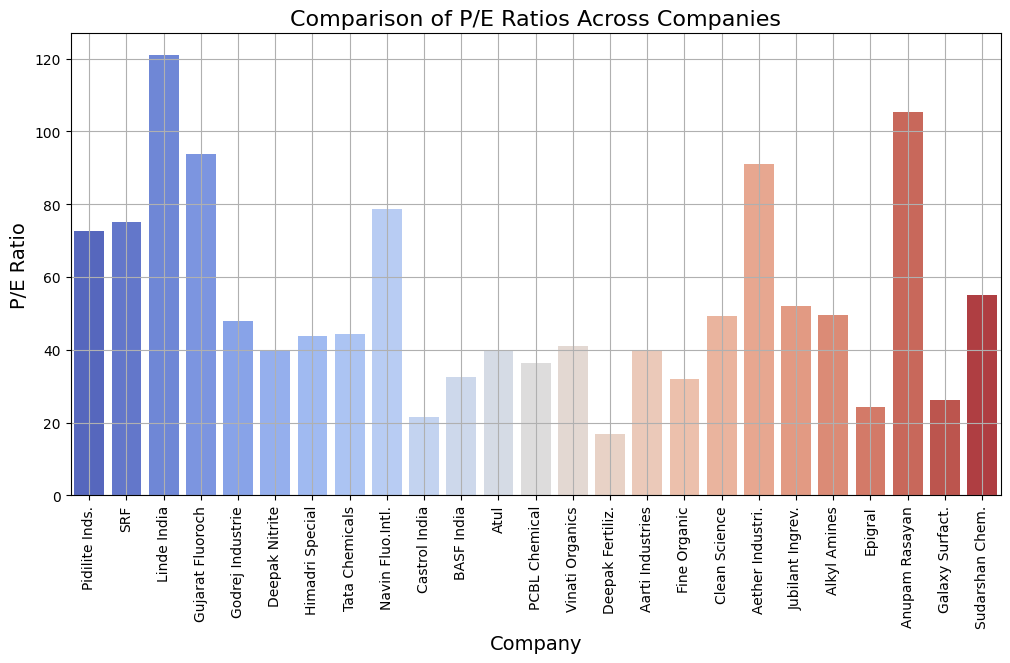

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='P/E', data=df, palette='coolwarm')
plt.title('Comparison of P/E Ratios Across Companies', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('P/E Ratio', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

b.) Compare Sales Growth of Different Companies (using a Scatter Plot)

<ipython-input-19-b65ecfc176be>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Name', y='Qtr Sales Var %', data=df, palette='viridis', s=100)


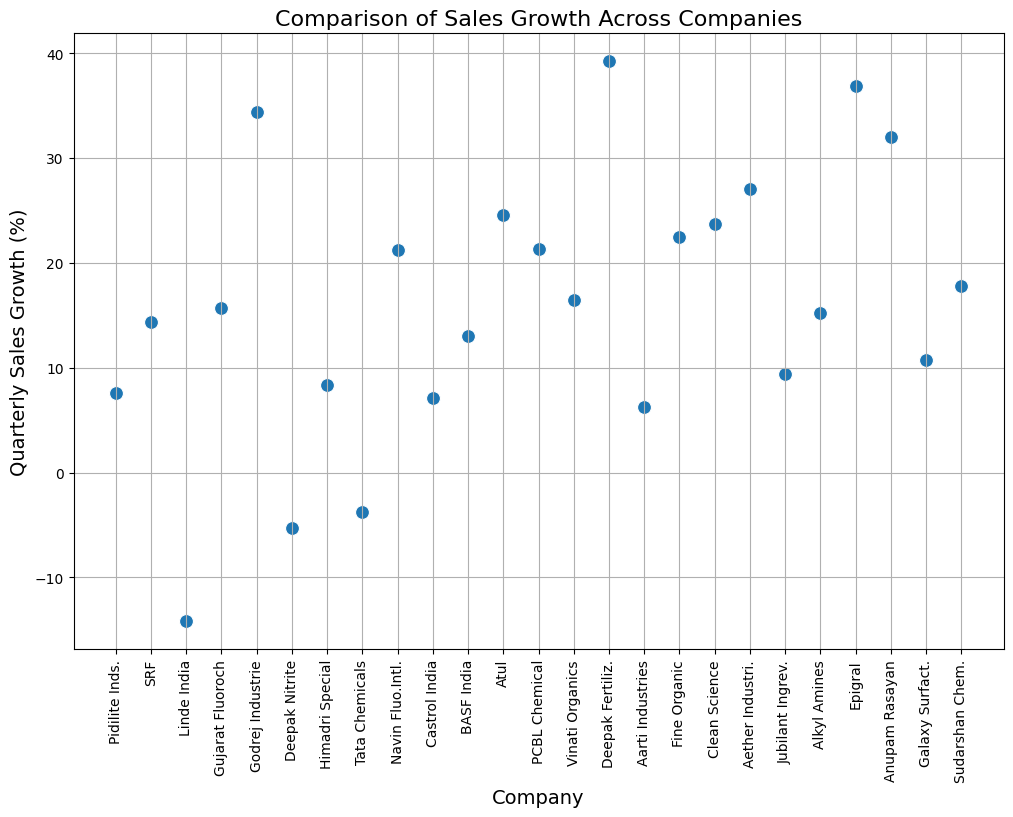

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Name', y='Qtr Sales Var %', data=df, palette='viridis', s=100)
plt.title('Comparison of Sales Growth Across Companies', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Quarterly Sales Growth (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


c.) Compare Profit Growth of Different Companies (using a Bar Plot)

<ipython-input-20-df592f6e18cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Qtr Profit Var %', data=df, palette='coolwarm')


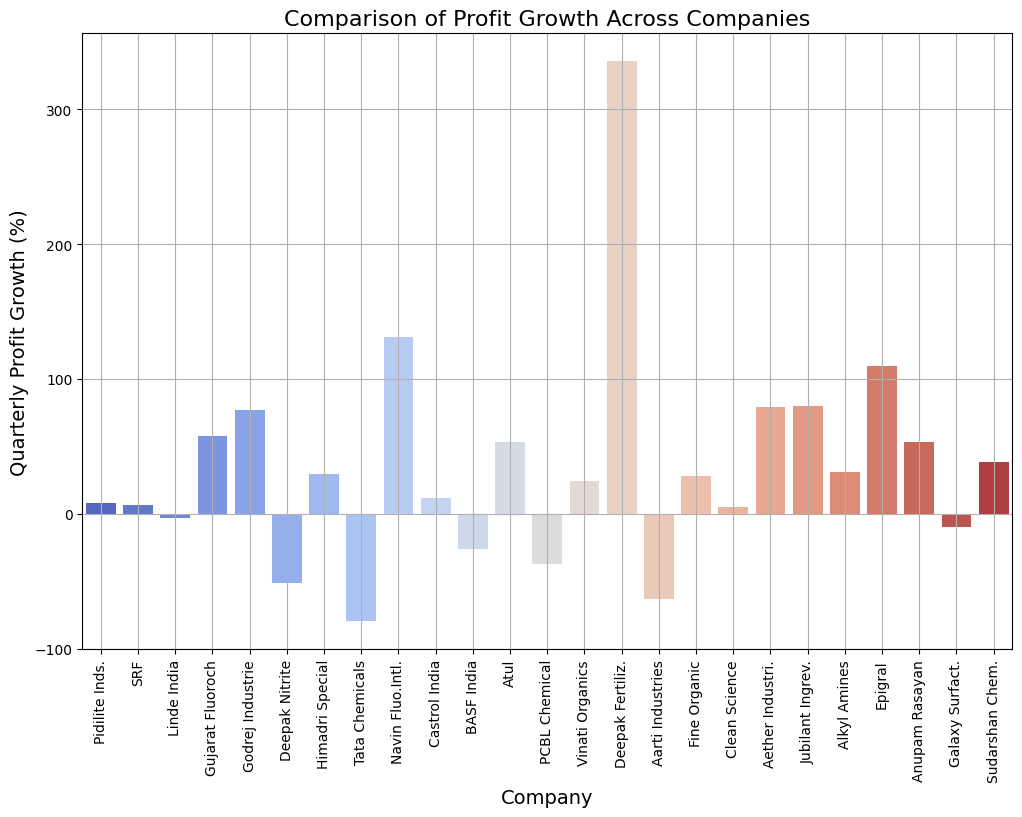

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Qtr Profit Var %', data=df, palette='coolwarm')
plt.title('Comparison of Profit Growth Across Companies', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Quarterly Profit Growth (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

d.) Compare ROCE of Different Companies (Scatter Plot)

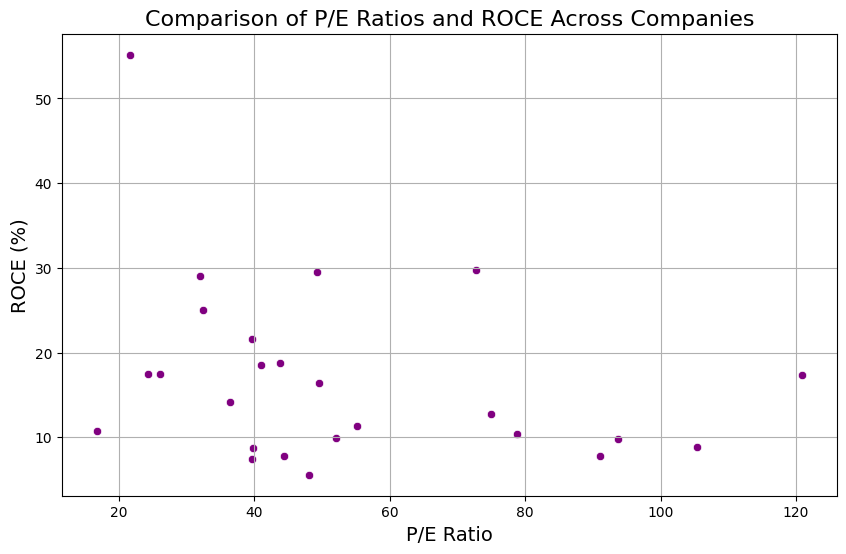

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P/E', y='ROCE %', data=df, color='purple')
plt.title('Comparison of P/E Ratios and ROCE Across Companies', fontsize=16)
plt.xlabel('P/E Ratio', fontsize=14)
plt.ylabel('ROCE (%)', fontsize=14)
plt.grid(True)
plt.show()

**15. Saving Tables to CSV Files**

 ---

In [ ]:
undervalued_companies.to_csv("undervalued_companies.csv", index=False)
fast_growers.to_csv("fast_growers.csv", index=False)
better_roce.to_csv("better_roce.csv", index=False)
better_sales.to_csv("better_sales.csv", index=False)
best_companies.to_csv("best_companies.csv", index=False)